In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

###  Load the data and analyse the attribues

In [4]:
df = pd.read_csv('USvideos.csv')

In [5]:
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
video_id          3197 non-null object
title             3197 non-null object
channel_title     3197 non-null object
category_id       3197 non-null int64
tags              3197 non-null object
views             3197 non-null int64
likes             3197 non-null int64
dislikes          3197 non-null int64
comment_total     3197 non-null int64
thumbnail_link    3197 non-null object
date              3197 non-null object
dtypes: int64(5), object(6)
memory usage: 274.8+ KB


In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_total
count,3197.000000,3.197000e+03,3.197000e+03,3197.000000,3197.000000
mean,19.942759,1.031151e+06,3.881820e+04,2178.112918,5217.271817
std,7.767437,2.346576e+06,1.068826e+05,14009.772277,25672.386761
min,1.000000,1.002000e+03,0.000000e+00,0.000000,0.000000
25%,17.000000,1.060050e+05,2.100000e+03,77.000000,328.000000
50%,23.000000,3.262850e+05,9.301000e+03,301.000000,1177.000000
75%,25.000000,1.081925e+06,3.335900e+04,1116.000000,3693.000000
max,29.000000,4.150067e+07,2.010366e+06,318404.000000,736179.000000


In [8]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [9]:
junk_cols = ['video_id', 'title', 'channel_title', 'category_id', 'tags','thumbnail_link', 'date']
for col in junk_cols:
    df = df.drop(col, axis=1)

In [10]:
df = df.dropna(axis =0)

### Basic visualization

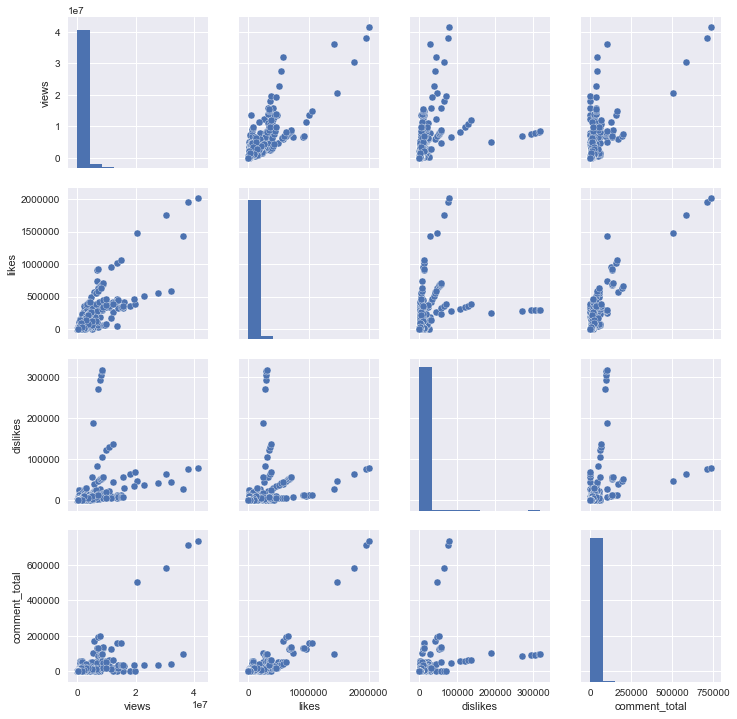

In [11]:
sns.pairplot(df, dropna=True)

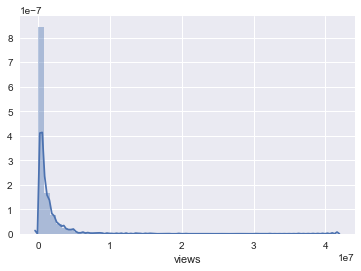

In [12]:
sns.distplot(df['views']);

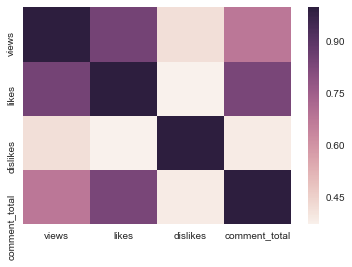

In [13]:
sns.heatmap(df.corr())

In [14]:
df.head()

,views,likes,dislikes,comment_total
0,4394029,320053,5931,46245
1,7860119,185853,26679,0
2,5845909,576597,39774,170708
3,2642103,24975,4542,12829
4,1168130,96666,568,6666


## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Survived column.

### X and y arrays

In [15]:
X = df[df.columns.difference(['views'])]
y = df['views']

In [16]:
X.head()

,comment_total,dislikes,likes
0,46245,5931,320053
1,0,26679,185853
2,170708,39774,576597
3,12829,4542,24975
4,6666,568,96666


In [17]:
y.head()

0    4394029
1    7860119
2    5845909
3    2642103
4    1168130
Name: views, dtype: int64

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32 )

In [20]:
print (len(X_train))
print (len(y_train))
print (len(X_test))
print (len(y_test))

2237
2237
960
960


## Build a model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lm.intercept_

249518.78875665029

In [26]:
lm.coef_

array([ -9.3735592 ,  16.23736028,  20.27746665])

In [27]:
X_train.columns

Index(['comment_total', 'dislikes', 'likes'], dtype='object')

In [28]:
pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coefficients'])

,Coefficients
comment_total,-9.373559
dislikes,16.237360
likes,20.277467


##  Predictions

In [29]:
preds = lm.predict(X_test)

In [30]:
preds[:5]

array([  312087.11736775,  3656245.71152344,   939457.82198938,
        4408949.933245  ,   254070.40482537])

In [31]:
y_test[:5]

1797    1071580
1003    3316413
938      868741
730     2970992
1993      98617
Name: views, dtype: int64

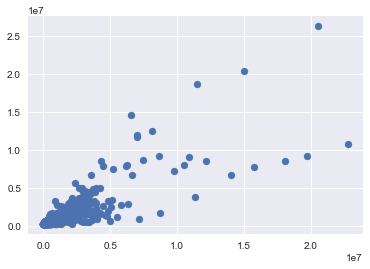

In [32]:
plt.scatter(y_test, preds)

In [33]:
# Residuals
y_test - preds

1797    7.594929e+05
1003   -3.398327e+05
938    -7.071682e+04
730    -1.437958e+06
1993   -1.554534e+05
169    -2.388618e+05
2078   -3.255549e+05
1929   -2.316340e+05
2434    4.555219e+05
18     -2.473096e+05
2761    1.054216e+06
439     3.656015e+05
2438    5.416226e+05
1175   -2.196533e+05
1077   -9.066394e+04
2933    1.497666e+05
1065   -4.503047e+05
501     3.899449e+04
2779   -2.449260e+05
2831   -4.213840e+05
2654    7.836723e+05
194    -2.879058e+05
2549   -2.209739e+05
2804    9.612139e+05
877    -2.698064e+05
1446   -2.589222e+05
1703   -2.174431e+05
1809    1.883100e+06
1221   -9.505948e+04
820     6.380442e+05
            ...     
1532   -1.510857e+05
2866   -1.397469e+05
505     1.814509e+05
1470   -2.294631e+05
2508   -2.581988e+05
2756   -1.904461e+05
1522   -2.610619e+05
3106    4.999656e+04
1716    5.891531e+05
521     2.046703e+06
214     3.667960e+05
39     -1.565357e+05
1669   -1.281954e+06
1748   -1.402659e+05
1840    8.402952e+05
2084   -1.872044e+05
85     -1.989

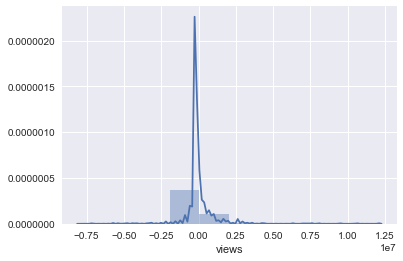

In [34]:
sns.distplot((y_test-preds),bins=10);
# If the residuls look normally distributed, then it's a very good sign

## Three common evaluation metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 524358.652405
MSE: 1.39752229876e+12
RMSE: 1182168.47309


###  R-Square score

In [37]:
# The r2_score function computes R², the coefficient of determination. 
# It provides a measure of how well future samples are likely to be predicted by the model 
# Best possible score is 1.0


print('Variance score: %.2f' % metrics.r2_score(y_test, preds))

Variance score: 0.68


## -------------------------------------------------END----------------------------------------------------

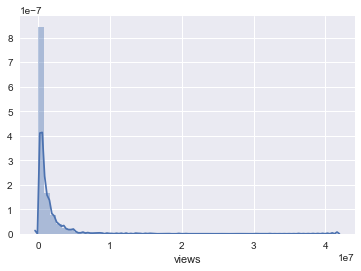

In [38]:
sns.distplot(df['views'])

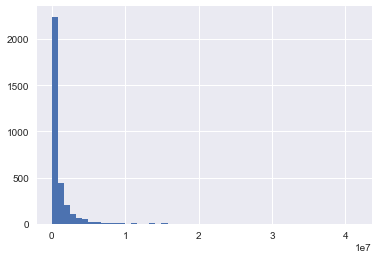

In [39]:
plt.hist(df['views'], bins = 50)
plt.show()

In [40]:
top_1_percent = np.percentile(df['views'], 99)
print(top_1_percent)

10549426.68


In [41]:
top_10_percent = np.percentile(df['views'], 90)
print(top_10_percent)

2460596.8
